В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
medical_df = pd.read_csv('medical-charges.csv') 
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [4]:
X = non_smoker_df.age.values
y = non_smoker_df.charges.values

n = len(y)

# Додаємо колонку одиничок до X
X_with_intercept = np.c_[np.ones((X.shape[0])), X]


In [5]:
#Методу МНК normal_equations

def normal_equations(X,y):
    # Обчислення коефіцієнтів w та b за рівнянням тета МНК
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

MNK_coefs = normal_equations(X_with_intercept, y)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [6]:
MNK_coefs, predictions_MNK

(array([-2091.42055657,   267.24891283]),
 array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]))

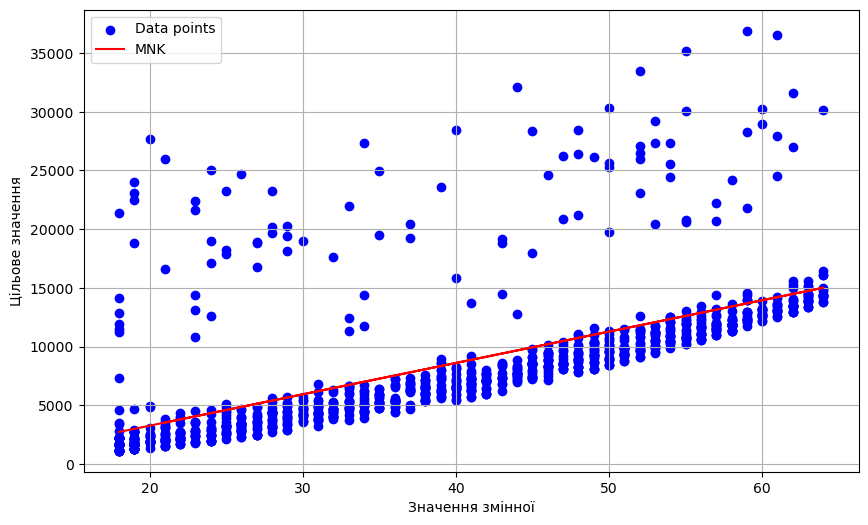

In [7]:
# Візуалізація 
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Full-Batch градієнтного спуску з numpy .

def full_batch_gradient_descent(X, y, lr, epochs):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = np.dot(m, X[:, 1]) + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 1])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors



In [9]:
learning_rates = [0.0001, 0.00001, 0.000001]
epochs = 12000

# Зберігатимемо результати для аналізу
results = []

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr, epochs)
    predictions_fbgd = np.dot(m, X_with_intercept[:, 1]) + b
    results.append((lr, m, b, errors, predictions_fbgd))
    print(f"Learning Rate: {lr}")
    print(f"Коефіцієнти лінійної регресії: m = {m}, b = {b}, predictions_fbgd = {predictions_fbgd}")
    

Learning Rate: 0.0001
Коефіцієнти лінійної регресії: m = 231.27852426105318, b = -493.84334578079034, predictions_fbgd = [3669.17009092 5981.95533353 7138.34795483 ... 3669.17009092 3669.17009092
 4363.0056637 ]
Learning Rate: 1e-05
Коефіцієнти лінійної регресії: m = 221.3130725869051, b = -51.240996385978136, predictions_fbgd = [3932.39431018 6145.52503605 7252.09039898 ... 3932.39431018 3932.39431018
 4596.33352794]
Learning Rate: 1e-06
Коефіцієнти лінійної регресії: m = 220.1758779139017, b = -0.7339997692275567, predictions_fbgd = [3962.43180268 6164.19058182 7265.06997139 ... 3962.43180268 3962.43180268
 4622.95943642]


In [10]:
best_fbgd_result = min(results, key=lambda x: x[3][-1])  # Вибираємо той, що має найменшу останню помилку
best_fbgd_coef = best_fbgd_result[1:3]
best_predictions_fbgd = best_fbgd_result[4]

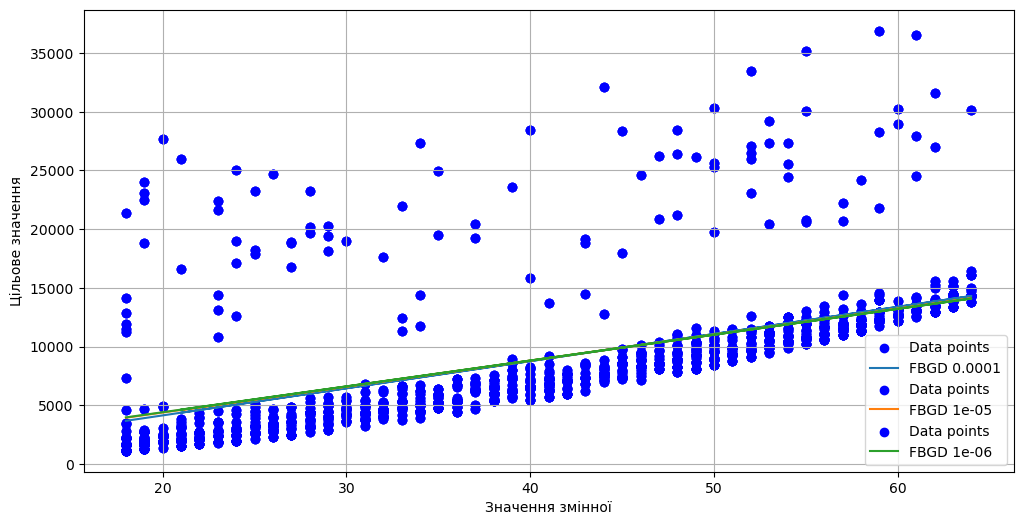

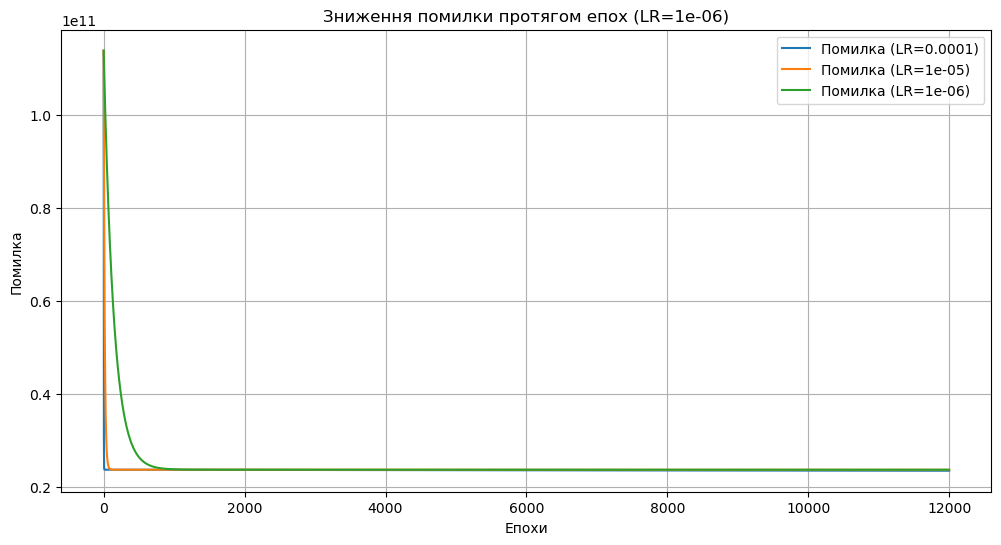

In [11]:
# Візуалізація 
plt.figure(figsize=(12, 6))

for i, (lr, m, b, errors, predictions_fbgd) in enumerate(results): 
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, predictions_fbgd, label=f'FBGD {lr}')
    plt.xlabel('Значення змінної')
    plt.ylabel('Цільове значення')
    plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for i, (lr, m, b, errors, predictions_fbgd) in enumerate(results):
    plt.plot(errors, label=f'Помилка (LR={lr})')
    plt.xlabel('Епохи')
    plt.ylabel('Помилка')
    plt.title(f'Зниження помилки протягом епох (LR={lr})')
    plt.legend()

plt.grid(True)
plt.show()

In [12]:
#З scikit-learn.LinearRegression

lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [13]:
lin_reg.fit(X_with_intercept, y)

LinearRegression()

In [14]:
sklearn_coef = lin_reg.coef_[1], lin_reg.intercept_
sklearn_coef

(267.2489128311982, -2091.420556565028)

In [15]:
predictions_sklearn = lin_reg.predict(X_with_intercept)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

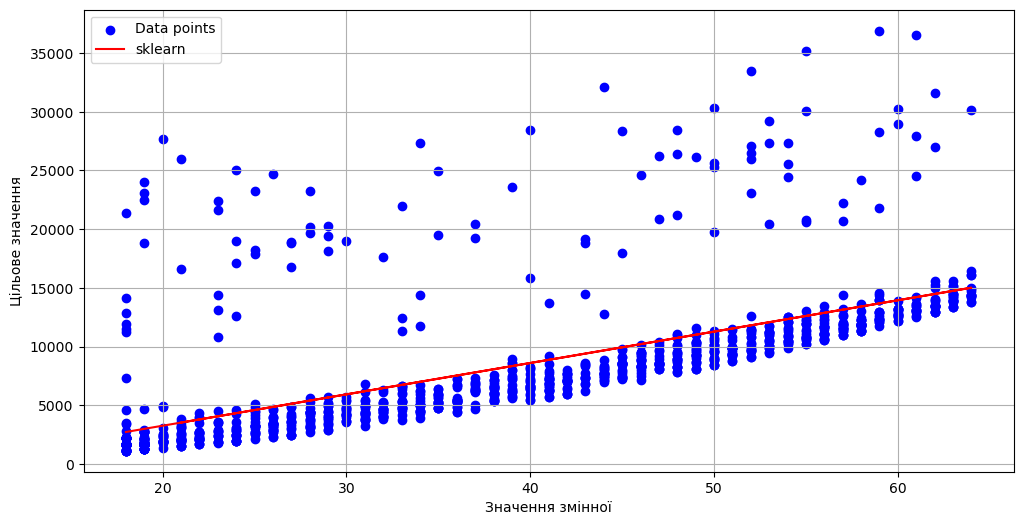

In [16]:
# Візуалізація 
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

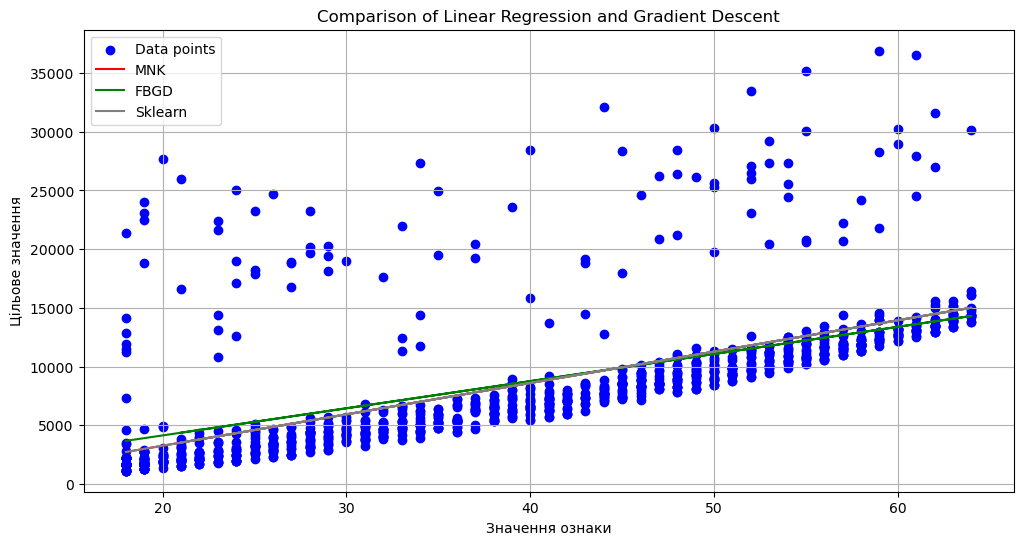

In [17]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, best_predictions_fbgd, color='green', label='FBGD')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
#Коефіцієнти

print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з повнопакетного град. спуску: ', best_fbgd_coef)
print('Коефіцієнти з sklearn: ', sklearn_coef)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з повнопакетного град. спуску:  (231.27852426105318, -493.84334578079034)
Коефіцієнти з sklearn:  (267.2489128311982, -2091.420556565028)


In [19]:
#Погнози

print('Прогнози з МНК: ', predictions_MNK)
print('Прогнози з повнопакетного град. спуску: ', best_predictions_fbgd)
print('Прогнози з sklearn: ', predictions_sklearn)


Прогнози з МНК:  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Прогнози з повнопакетного град. спуску:  [3669.17009092 5981.95533353 7138.34795483 ... 3669.17009092 3669.17009092
 4363.0056637 ]
Прогнози з sklearn:  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [20]:
# RMSE

rmse_MNK = mean_squared_error(y, predictions_MNK, squared=False)
print('RMSE МНК: ', rmse_MNK)
rmse_fbgd = mean_squared_error(y, best_predictions_fbgd, squared=False)
print('RMSE повнопакетного град. спуску: ', rmse_fbgd)
rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE повнопакетного град. спуску:  4693.40626368379
RMSE sklearn:  4662.505766636395


**Висновок**

Отримали результати трьох моделей по знаходженню оптимальних коефіцієнтів для побудови лінії прогнозу charges за age для некурців.

Маємо приблизно однакову точніть порівнюючи між модлями 4662-4693, що означає, що в середньому, кожен елемент у прогнозі відрізняється від фактичної цілі на $4662-4693

Як розбирали в лекції - Метод найменших квадратів (МНК) та scikit-learn мають однакові формули для обрахунку, і в мене вийшло отримати однакові значення. Ці функції забезпечує швидке й ефективне обчислення лінійної регресії і надає точні коефіцієнти.
Також в завданні попередньої теми знаходила кофіцієнти по прямим формулам і отримала ціж результати.

Метод градієнтного спуску трішки більш ускладнює процес за рахунок ручного підбору learning rate, кількості ітерацій та часу виконання, хоча в моєму результаті мені вдалось підібрати вірні дані і лінія дуже близька до попередніх методів.

Тож я б обирала пошук коефіцієнтів за допомогою scikit-learn, так як це найоптимаьніше і точне рішення. але за потріби можна перевіряти себе іншмими методами.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [21]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [22]:
X_s = smoker_df.age.values
y_s = smoker_df.charges.values

n = len(y_s)

# Додаємо колонку одиничок до X
X_s_with_intercept = np.c_[np.ones((X_s.shape[0])), X_s]

In [23]:
lin_reg_smocer = LinearRegression()
lin_reg_smocer

LinearRegression()

In [24]:
lin_reg.fit(X_s_with_intercept, y_s)

LinearRegression()

In [25]:
sklearn_coef_smoke = lin_reg.coef_[1], lin_reg.intercept_
predictions_sklearn_smoke = lin_reg.predict(X_s_with_intercept)
rmse_sklearn_smoke = mean_squared_error(y_s, predictions_sklearn_smoke, squared=False)

In [26]:
print("Коефіцієнти моделі для курців:", sklearn_coef_smoke)
print('RMSE sklearn для курців: ', rmse_sklearn_smoke)

Коефіцієнти моделі для курців: (305.23760210982874, 20294.12812691597)
RMSE sklearn для курців:  10711.00334810241


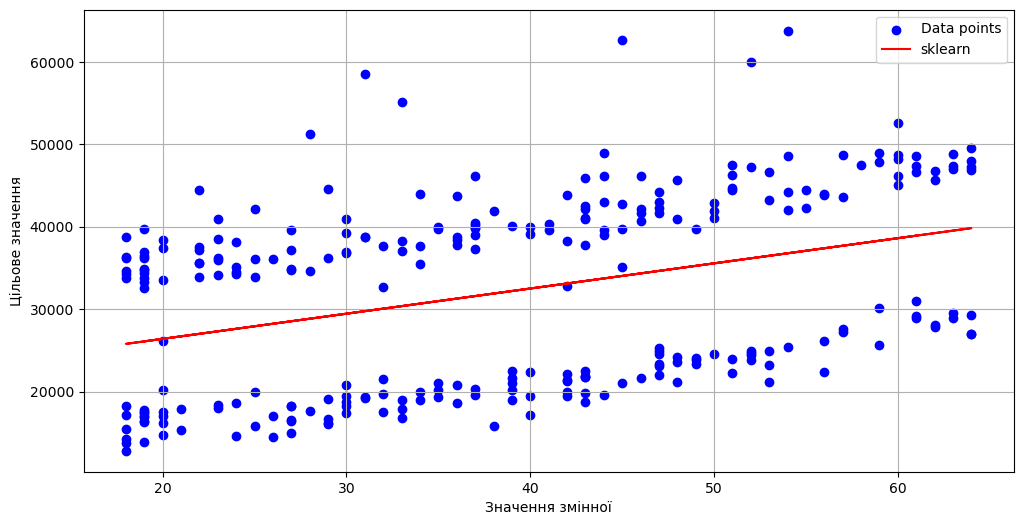

In [27]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X_s, y_s, color='blue', label='Data points')
plt.plot(X_s, predictions_sklearn_smoke, color='red', label='sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Висновок**

Для навчання ми використали scikit-learn бібліотеки і точність цієї можелі за RMSE = 10711.00334810241, що значить, що в середньому, кожен елемент у прогнозі відрізняється від фактичної цілі на $10711, Порівнюючи з результатами для некурців це є набагато більше похибка.

Розглянувши графік ми явно бачимо, що наші дані не є лінійно залежними, а точніше розділились на дві групи лінійних залежностей.
Тому можна зробити висновок, що саме в цьому випадку це не є оптимальним методом навчанння.

Варто провести додаткові дослідження, враховуючи більше даних і розглядаючи інші фактори, які можуть впливати на медичні витрати, для того щоб остаточно визначитись з моделю навчання для цього випадку.